### Image Processing - How does scikit-image work

* Image Processing
* Read in data, gradyscal, Basics stats of image
* represent the image in alternative from or image is doctored or not

In [1]:
from skimage import data, io, filters
from PIL import Image
from skimage.color import rgb2gray
from skimage.filters import try_all_threshold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

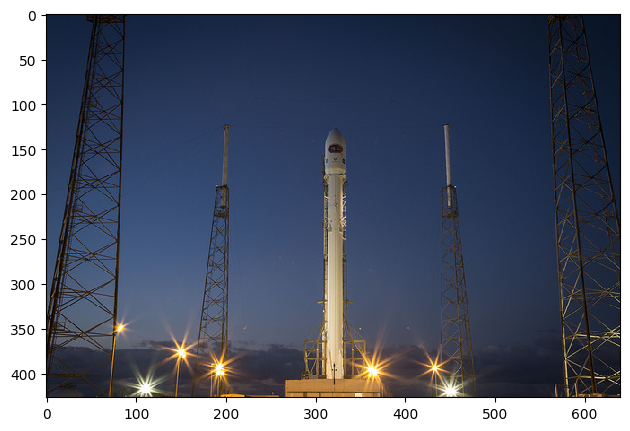

In [2]:
image = data.rocket()
io.imshow(image)
plt.show()

In [3]:
image[:3,:3]

array([[[17, 33, 58],
        [17, 33, 58],
        [17, 33, 59]],

       [[17, 33, 58],
        [17, 33, 58],
        [17, 33, 59]],

       [[18, 34, 59],
        [18, 34, 59],
        [18, 34, 60]]], dtype=uint8)

In [4]:
image.shape

(427, 640, 3)

In [5]:
image.size

819840

In [6]:
red = image[:,:,0]

In [7]:
red

array([[ 17,  17,  17, ...,   8,   8,   7],
       [ 17,  17,  17, ...,   8,   8,   8],
       [ 18,  18,  18, ...,   8,   8,   8],
       ...,
       [ 27,  29,  20, ..., 136, 186, 173],
       [ 26,  29,  30, ..., 103,  97,  76],
       [ 26,  29,  40, ...,  82,  79,  83]], dtype=uint8)

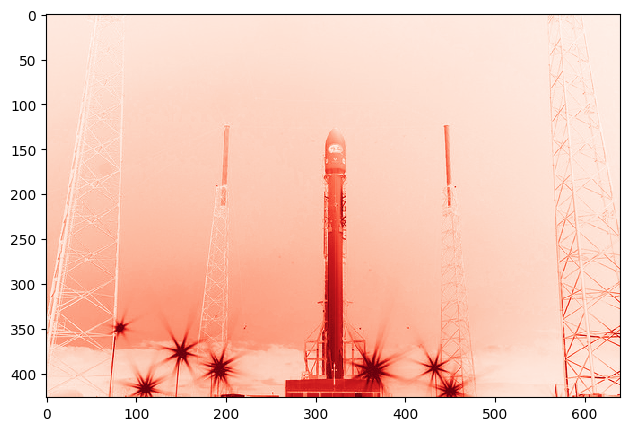

In [8]:
io.imshow(red, cmap = "Reds")

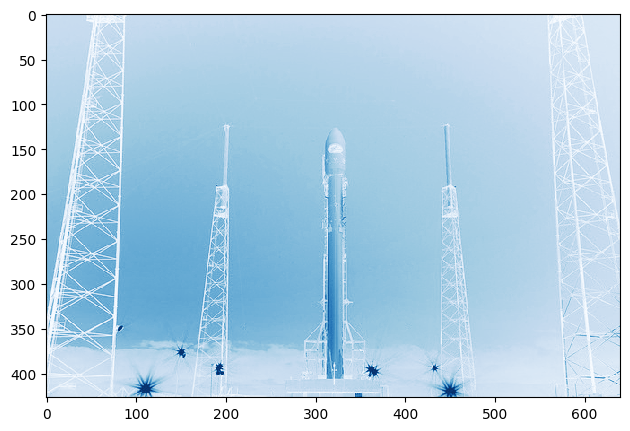

In [9]:
blue = image[:,:,2]
io.imshow(blue, cmap="Blues")

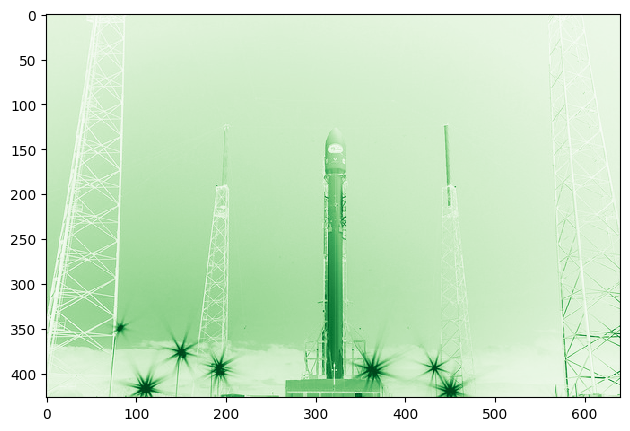

In [10]:
greens = image[:,:,1]
io.imshow(greens, cmap="Greens")

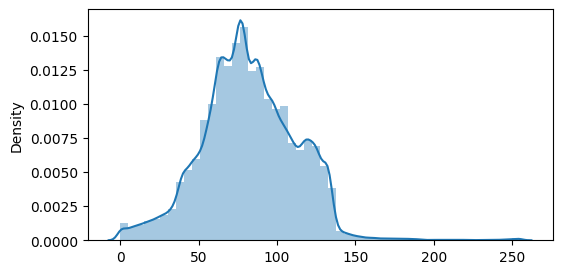

In [11]:
plt.figure(figsize = (6,3))
sns.distplot(blue)
plt.show()

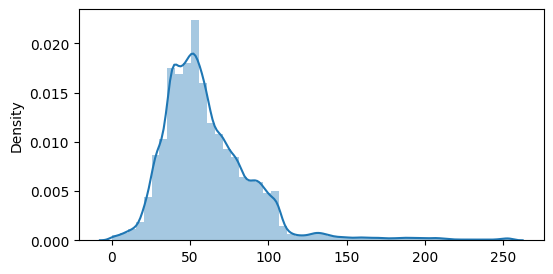

In [12]:
plt.figure(figsize = (6,3))
sns.distplot(greens)
plt.show()

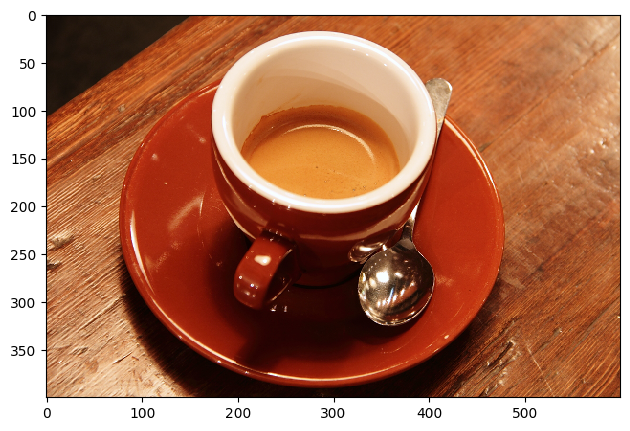

In [14]:
coffee = data.coffee()
io.imshow(coffee)

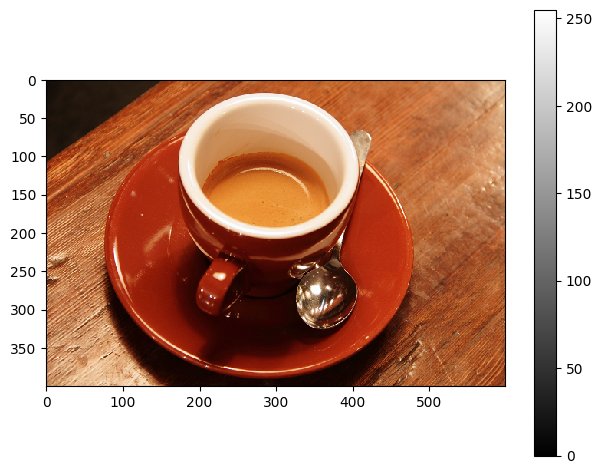

In [15]:
img = io.imshow(coffee)
plt.colorbar(img)

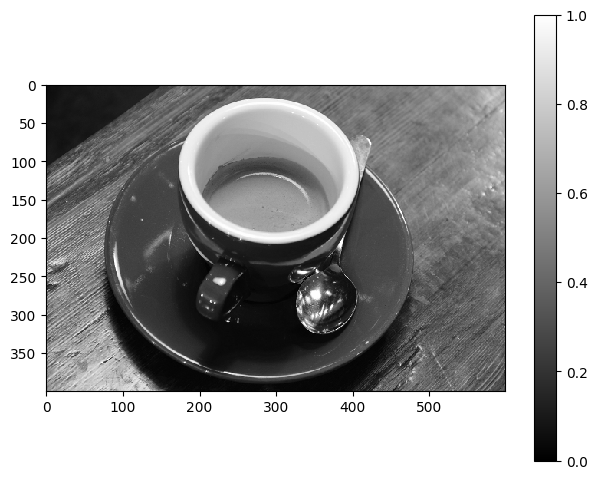

In [17]:
grey_coffee = rgb2gray(coffee)
img_1 = io.imshow(grey_coffee)
plt.colorbar(img_1)

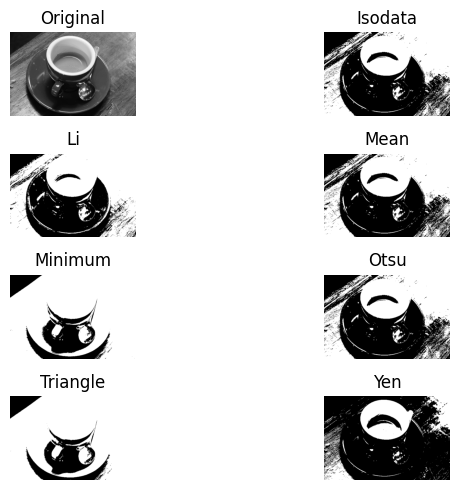

In [18]:
fig, ax = try_all_threshold(grey_coffee,verbose=False)
plt.show(fig,ax)

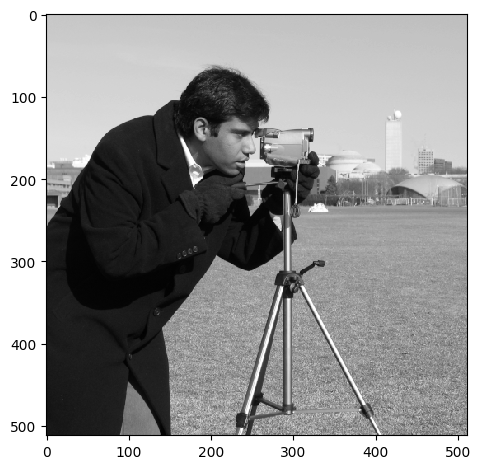

In [19]:
io.imshow(data.camera())

In [20]:
filename = "hotel.jpg"

In [21]:
with Image.open(filename) as img:
    img.load()

In [22]:
type(img)

PIL.WebPImagePlugin.WebPImageFile

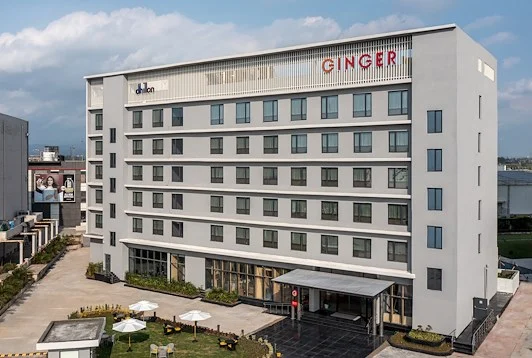

In [23]:
img

### Image:

Any image will contains 4 elemnts in the form of tuple

* left
* right
* upper
* bottom

In [24]:
cropped_img = img.crop((250,180,600,780))

In [25]:
cropped_img.size

(350, 600)

In [26]:
cropped_img.show()

In [28]:
result = cropped_img.resize((cropped_img.width // 2, cropped_img.height // 2))

In [29]:
result.show()

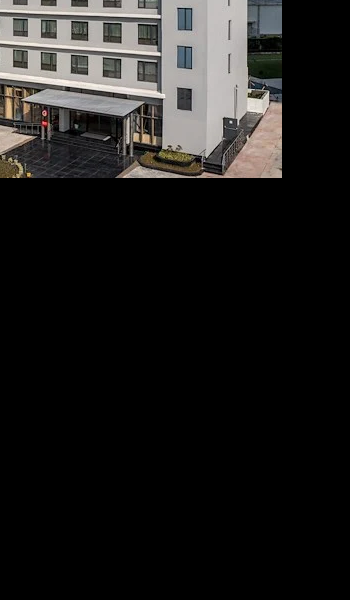

In [33]:
cropped_img.reduce(1)

In [34]:
result_img = img.transpose(Image.FLIP_TOP_BOTTOM)
result_img.show()

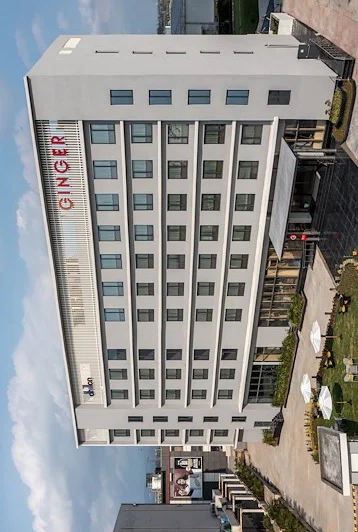

In [35]:
img.transpose(Image.ROTATE_90)

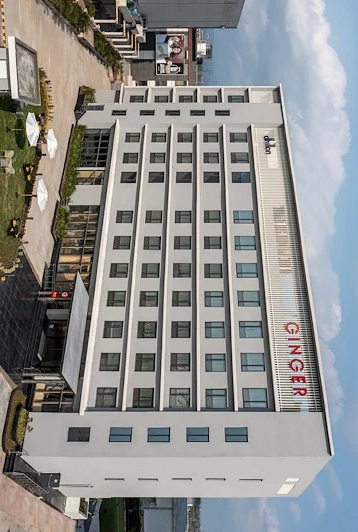

In [36]:
img.transpose(Image.ROTATE_270)

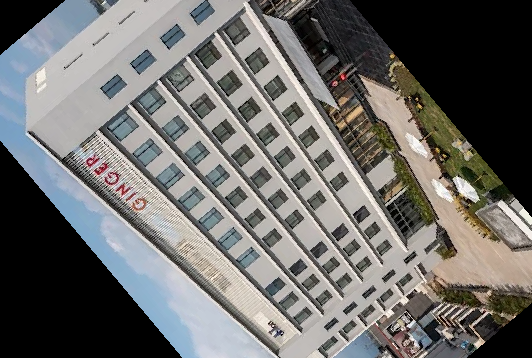

In [40]:
img.rotate(130)

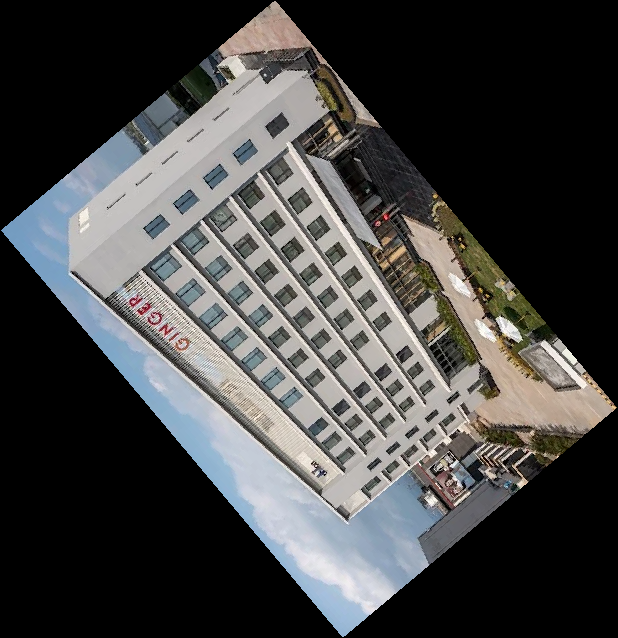

In [41]:
img.rotate(130, expand = True)

In [42]:
grey_imge = img.convert("L") # "L" -> indicating to gayscale image

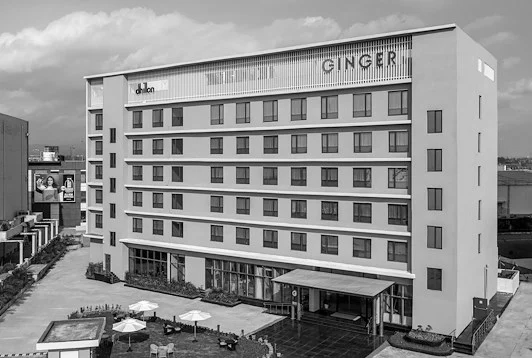

In [43]:
grey_imge

In [44]:
img.getbands()

('R', 'G', 'B')

In [45]:
red,green,blue = img.split()

In [46]:
red.mode

'L'

In [48]:
zeroBand = red.point(lambda _: 0)
red_merge = Image.merge("RGB", (red, zeroBand, zeroBand))
green_merge = Image.merge("RGB", (zeroBand,green, zeroBand))
blue_merge = Image.merge("RGB",(zeroBand,zeroBand,blue))

In [49]:
red_merge.show()

In [50]:
green_merge.show()

In [51]:
blue_merge.show()

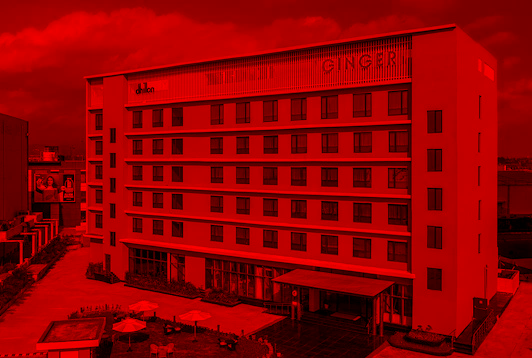

In [52]:
red_merge

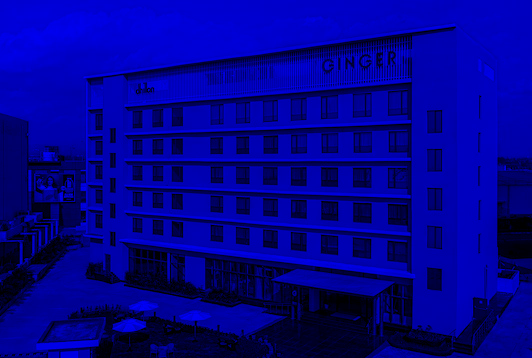

In [54]:
blue_merge

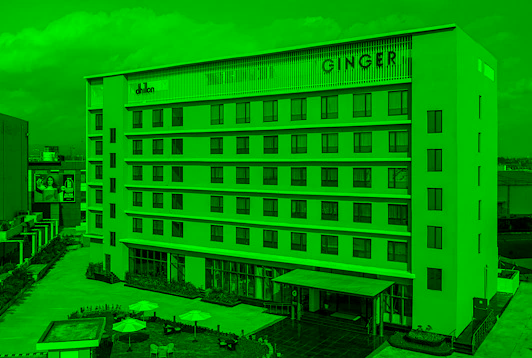

In [55]:
green_merge

### Blurring of Image

In [56]:
from PIL import Image, ImageFilter

In [57]:
blurr_image = img.filter(ImageFilter.BLUR)

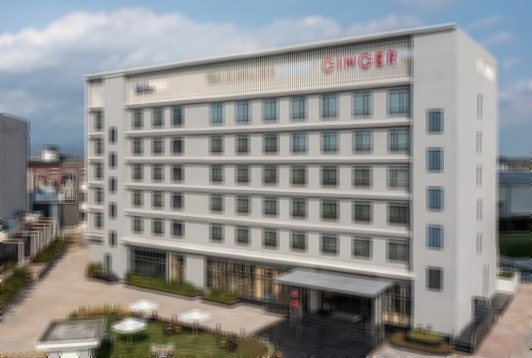

In [58]:
blurr_image

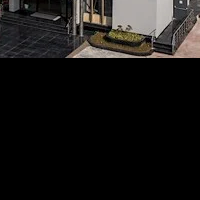

In [59]:
img.crop((300,300,500,500))

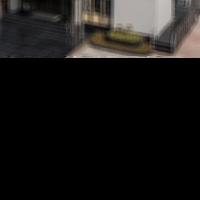

In [60]:
blurr_image.crop((300,300,500,500))

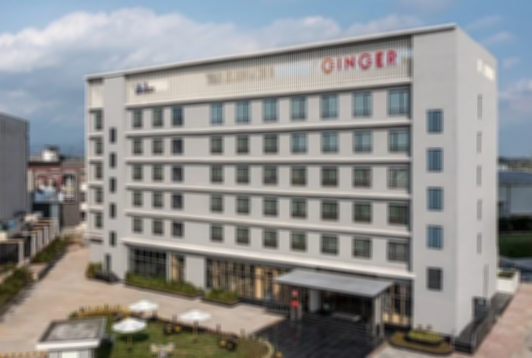

In [73]:
img.filter(ImageFilter.BoxBlur(2))

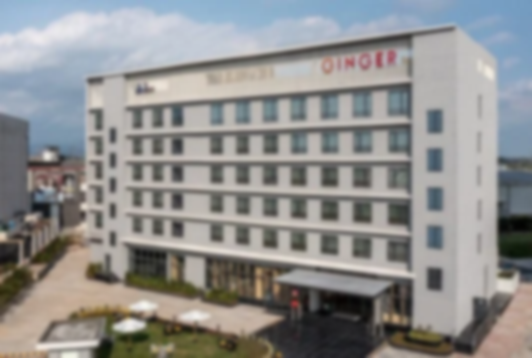

In [76]:
img.filter(ImageFilter.GaussianBlur(2))

In [77]:
img_gray = img.convert("L")
edges = img_gray.filter(ImageFilter.FIND_EDGES)

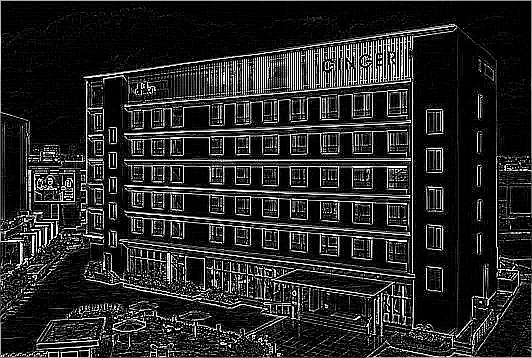

In [78]:
edges